In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [8]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [9]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


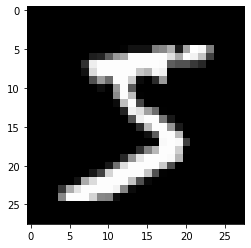

In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

#### Normalization

In [11]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [12]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [13]:
train_data.shape

(60000, 784)

#### One-hot encoding

In [14]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다.

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [16]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 2. Build the model & Set the criterion

tf.keras

- Sequential ⮕ Today!
- Functional

In [17]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



In [18]:
model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) # Dense-layer (relu & he)
# kernel_initializer의 default는 자비에?
# he_uniform 혹은 he_normal을 사용할 수 있다. 성능이 더 좋은거 쓰면 됨
model.add(layers.Dropout(0.2)) # Dropout-layer
# 여기부터는 Dropout은 죽일 비율을 뜻한다.
# ver1과는 반대


# layer를 추가할거면 아래와 같이
# model.add(layers.Dense(units=256, activation='relu', kernel_initializer='he_normla'))
# 이 때, input_dim은 맨 처음 설정한 값을 따라감

model.add(layers.Dense(units=10, activation='softmax')) # (Output) Dense-layer with softmax function, 0~9 -> 10
# units은 outputlayer가 가졌으면 하는 퍼셉트론 수
# 우리는 10개의 열이기 때문에 유닛 또한 10

In [19]:
# "Compile" the model description (Configures the model for training)
# model.compile을 해줘야 사람이 쓴 코드를 컴퓨터가 이해할 수 있도록 변환됨
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=['accuracy']) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
# # Regression
# model.add(layers.Dense(units=1, activation=None))
# model.compile(optimizer='adam',
#               loss=losses.mean_squared_error,
#               metrics=['mean_squared_error']) 

# # Multi-class classification
# model.add(layers.Dense(units=10, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,        # <- Label이 One-hot 형태일 경우
#               loss=losses.sparse_categorical_crossentropy, # <- Label이 One-hot 형태가 아닐 경우
#               metrics=['accuracy']) 

# # Binary Classification 1 (Softmax를 적용하는 경우, recommended)
# model.add(layers.Dense(units=2, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,
#               metrics=['accuracy']) 

# # Binary Classification 2 (Sigmoid를 적용하는 경우)
# # 선형결합 결과에 대해 sigmoid function의 output을 계산해주면, binary_crossentropy가 이를 음성 & 양성 확률로 변환하여 처리해줍니다.
# model.add(layers.Dense(units=1, activation='sigmoid')) 
# model.compile(optimizer='adam',
#               loss=losses.binary_crossentropy, 
#               metrics=['accuracy']) 

#### 3. Train the model

In [22]:
# Fit the model on training data

model.fit(train_data, train_label, batch_size=100, epochs=10) # default batch_size = 32

Epoch 1/10
600/600 [==============================] - 9s 11ms/step - loss: 0.2691 - accuracy: 0.9215
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 0.1144 - accuracy: 0.9663
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0787 - accuracy: 0.9763
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0592 - accuracy: 0.9821
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 8/10
600/600 [==============================] - 6s 11ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 9/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 10/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0196 - accura

#### 4. Test the model

In [23]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

100/100 [==============================] - 1s 7ms/step - loss: 0.0731 - accuracy: 0.9785


In [24]:
import numpy as np

np.sum(model.predict(test_data[0:1, :]))

1/1 [==============================] - 0s 139ms/step


1.0

In [25]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.07314357161521912
test accuracy : 0.9784999489784241


### (Appendix 1) tf.keras.layers.Flatten() 활용법

In [26]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

train_data.shape

(60000, 28, 28)

In [27]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

train_data.reshape(60000,784).shape

(60000, 784)

In [28]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# 아래 코드에서 reshape 적용을 생략하고, 대신 Flatten 레이어를 활용해 펼쳐낼 수 있습니다.
# train_data = train_data.reshape(60000, 784) / 255.0
# test_data = test_data.reshape(10000, 784) / 255.0

train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)


model = models.Sequential() 

model.add(layers.Flatten()) # takes our 28x28 and makes it 1x784

# model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) 
model.add(layers.Dense(units=512, activation=tf.nn.relu, kernel_initializer='he_uniform')) # tf.nn 활용이 가능합니다.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax)) # tf.nn 활용이 가능합니다.

model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(train_data, train_label, batch_size=100, epochs=10) 

result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2680 - accuracy: 0.9228
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1131 - accuracy: 0.9668
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0764 - accuracy: 0.9768
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0580 - accuracy: 0.9821
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0469 - accuracy: 0.9850
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0360 - accuracy: 0.9889
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 8/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 9/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 10/10
100/100 [==============================] - 1s 10ms/step - loss: 0.0691 - accura

### (Appendix 2) AutoKeras 활용법 (https://autokeras.com/)

**\* <span style="color:blue;">AutoKeras보다 더 유용한 도구인 Keras-Tuner를 곧 학습할 예정입니다.</span>**

\* PyTorch 및 AutoKeras 설치 & AutoKeras fitting 과정에 시간이 무척 많이 소요됩니다.
<br>\* 개발환경이 영향을 받을 수 있으니 아래 코드는 **<span style="color:red;">Google Colab 에서 실행</span>**하시는 것을 적극 권장합니다. (혹은 Conda 가상환경 활용)
<br>\* 금일 실습을 마치고 추후 복습하실 때 살펴보세요.
<br><br>

1) 먼저 OS에 맞는 pytorch를 설치해주어야 합니다. (available pip whl files @ https://goo.gl/uYVaPa)

>conda install pytorch torchvision torchaudio cpuonly -c pytorch

2) 그 다음 아래 명령어로 AutoKeras를 설치해줍니다.

> pip install autokeras

In [29]:
from keras import datasets, models, layers, utils
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [30]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 kB 3.1 MB/s eta 0:00:005.5 MB/s eta 0:00:01
  Using cached tensorflow-2.9.1-cp39-cp39-macosx_10_14_x86_64.whl (228.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.9 MB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-macosx_10_14_x86_64.whl (1.6 MB)


In [31]:
import autokeras as ak

model = ak.ImageClassifier() # It searches CNN architectures for the best configuration for the image dataset.
model.fit(train_data, train_label, time_limit=3600) # time_limit: The time limit for the search in seconds.

accuracy = model.evaluate(test_data, test_label)
result = model.predict(test_data)

print(accuracy)
print(result)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
vanilla           |?                 |image_block_1/block_type
True              |?                 |image_block_1/normalize
False             |?                 |image_block_1/augment
3                 |?                 |image_block_1/conv_block_1/kernel_size
1                 |?                 |image_block_1/conv_block_1/num_blocks
2                 |?                 |image_block_1/conv_block_1/num_layers
True              |?                 |image_block_1/conv_block_1/max_pooling
False             |?                 |image_block_1/conv_block_1/separable
0.25              |?                 |image_block_1/conv_block_1/dropout
32                |?                 |image_block_1/conv_block_1/filters_0_0
64                |?                 |image_block_1/conv_block_1/filters_0_1
flatten           |?                 |classification_head_1/spatial_reduction_1/reduction_type
0.5               |?            

TypeError: fit() got an unexpected keyword argument 'time_limit'

<br>

#### Appendix 
- Automated Machine Learning with Auto-Keras @ http://j.mp/2xeG2c2
- Keras vs PyTorch @ https://goo.gl/ar5VPB

## Dropout + BN

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [9]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

#### Normalization

In [10]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

#### One-hot encoding

In [11]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [12]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [13]:
model.compile(optimizer=optimizers.Adam(0.005), #Adam안에 이는 ()에서 learning rate 부여 가능
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

<br> 

#### 3. Train the model

In [14]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.

history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15


2022-06-30 14:30:35.649756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - ETA: 0s - loss: 0.2303 - categorical_accuracy: 0.9297

2022-06-30 14:30:46.251409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 12s 20ms/step - loss: 0.2303 - categorical_accuracy: 0.9297 - val_loss: 0.1139 - val_categorical_accuracy: 0.9653
Epoch 2/15
480/480 [==============================] - 10s 20ms/step - loss: 0.1189 - categorical_accuracy: 0.9625 - val_loss: 0.1087 - val_categorical_accuracy: 0.9675
Epoch 3/15
480/480 [==============================] - 9s 20ms/step - loss: 0.0893 - categorical_accuracy: 0.9714 - val_loss: 0.0923 - val_categorical_accuracy: 0.9739
Epoch 4/15
480/480 [==============================] - 9s 20ms/step - loss: 0.0728 - categorical_accuracy: 0.9771 - val_loss: 0.0841 - val_categorical_accuracy: 0.9766
Epoch 5/15
480/480 [==============================] - 9s 20ms/step - loss: 0.0625 - categorical_accuracy: 0.9798 - val_loss: 0.0824 - val_categorical_accuracy: 0.9777
Epoch 6/15
480/480 [==============================] - 10s 20ms/step - loss: 0.0543 - categorical_accuracy: 0.9824 - val_loss: 0.0883 - val_categorical_accuracy: 0.9762
Epoch 

<br> 

#### 4. Test the model

In [15]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 1s 10ms/step - loss: 0.0775 - categorical_accuracy: 0.9812
loss (cross-entropy) : 0.07750407606363297
test accuracy : 0.9811999797821045


<br> 

#### 5. Visualize the result

In [16]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

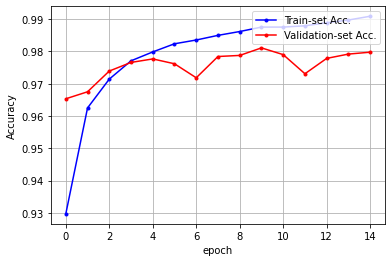

In [17]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()